In [1]:
from src.utils import *
from src.filter import *
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt


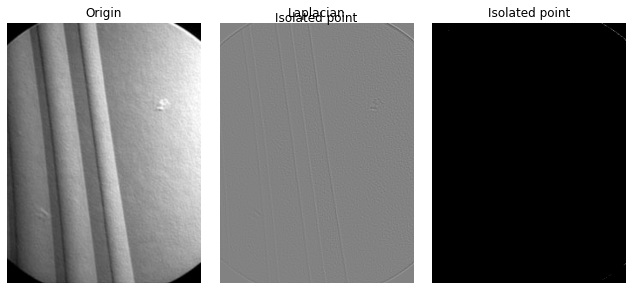

In [3]:
#Isolated point
windfl = cv2.imread("data/10.2/img2.png", 0)

edged = edge_based(windfl)

laplacian = edged.convolution(KERNEL['laplacian'])

isolated = edged.isolated_point(0.4)

multiplot("Isolated point", {"Origin": windfl, "Laplacian": laplacian, "Isolated point" : isolated})


In [4]:
#Gradient

building = cv2.imread("data/10.2/img4.png", 0)

edged = edge_based(building)

robert = edged.edge_detection("grad")
sobel = edged.edge_detection("sobel")
prewitt = edged.edge_detection("prewitt")
kirish = edged.edge_detection("kirish")


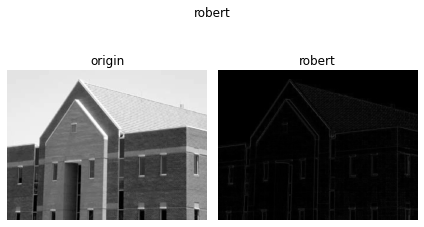

In [7]:
multiplot("robert", {"origin":building, "robert":robert})

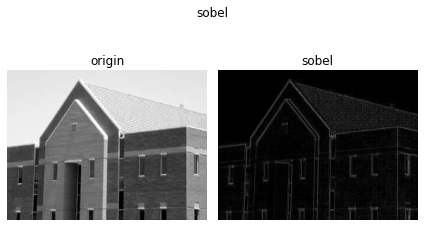

In [8]:
multiplot("sobel", {"origin":building, "sobel":sobel})

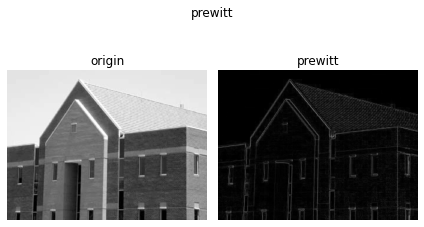

In [9]:
multiplot("prewitt", {"origin":building, "prewitt":prewitt})

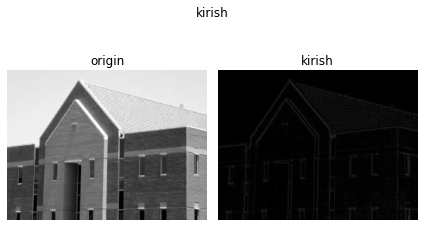

In [10]:
multiplot("kirish", {"origin":building, "kirish":robert})

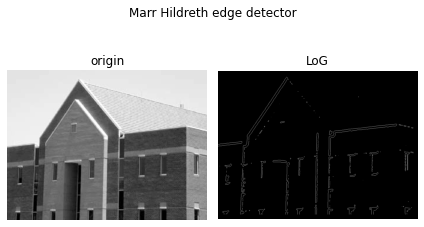

In [16]:
#Marr hildreth

marrhil = Marr_hildreth(building)

LoG = marrhil.LoG()

multiplot("Marr Hildreth edge detector", {"origin":building, "LoG":LoG})

<function matplotlib.pyplot.show(*args, **kw)>

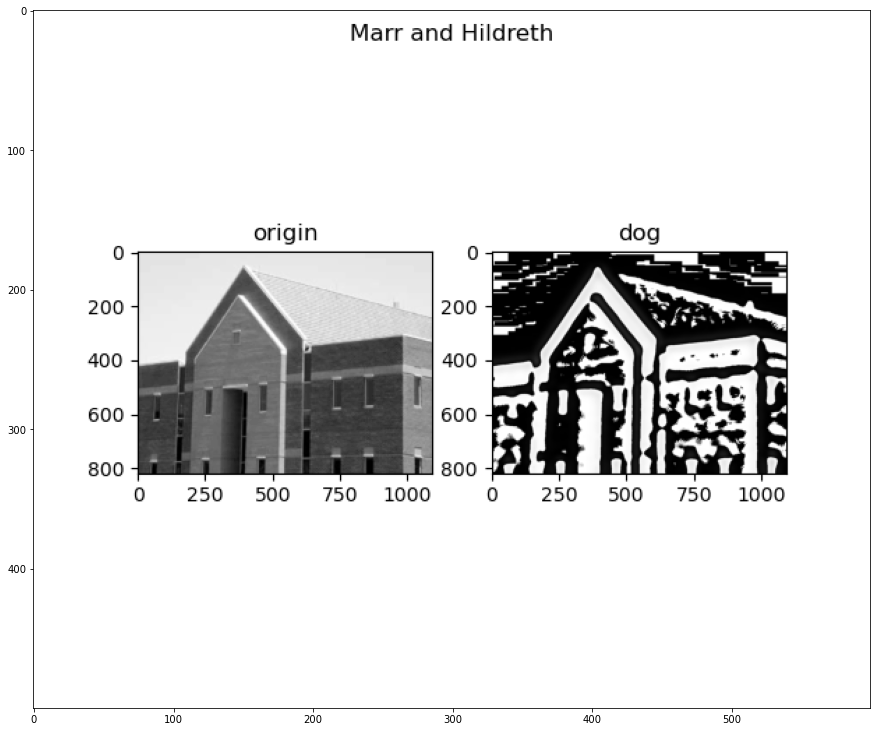

In [20]:
DoG = cv2.imread("output/10.2/dog_output.png", 0)
plt.figure(figsize=(15,20))
plt.imshow(DoG, cmap="gray")
plt.show

<Figure size 1080x1440 with 0 Axes>

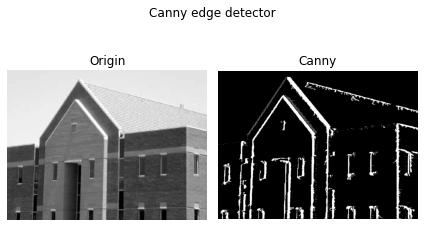

In [22]:
#Canny edge detector

canny = Canny(building)

res = canny.canny(0.1, 0.3)

multiplot("Canny edge detector", {"Origin": building, "Canny": res})


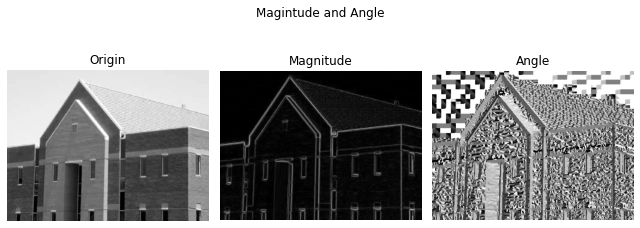

In [23]:
#Magnitude and Angle

G = marrhil.gaus_dis(4)

f = convolution2d(building).convolution(G)

gx = convolution2d(f).convolution(KERNEL["sobel"]['left'])
gy = convolution2d(f).convolution(KERNEL["sobel"]['right'])

mag = np.sqrt(np.power(gx, 2) + np.power(gy, 2))

arctan = np.arctan2(gy, gx)

multiplot("Magintude and Angle", {"Origin":building, "Magnitude":mag, "Angle":arctan})

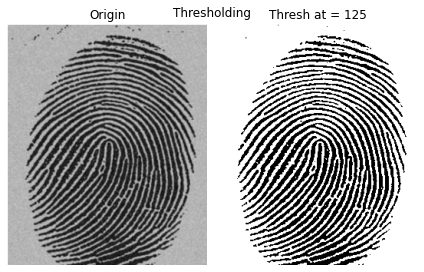

In [36]:
#Thresholding
fprint = cv2.imread("data/10.3/img1.png", 0) 

thresh = Thresholing(fprint)
res_thresh = thresh.thresh()

multiplot("Thresholding", {"Origin": fprint, "Thresh at = 125" : res_thresh})

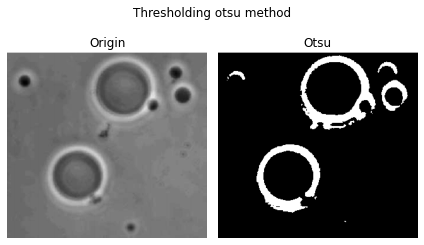

In [38]:
#Otsu method

blur = cv2.imread("data/10.3/img2.png", 0)

otsu = Thresholing(blur)
res_otsu = otsu.threshold_otsu_implement()

multiplot("Thresholding otsu method", {"Origin": blur, "Otsu" : res_otsu})

In [ ]:


img = cv2.imread(r'data\10.2\img4.png')
SM_segment = Split_Merge_Segmented(img)
SM_segment.segment()


In [ ]:
img = cv2.imread(r'data\10.2\test.jpg')
slic = SLIC(img)
slic.slic(400)

In [ ]:
Clustering(img).kmeans(6,10)


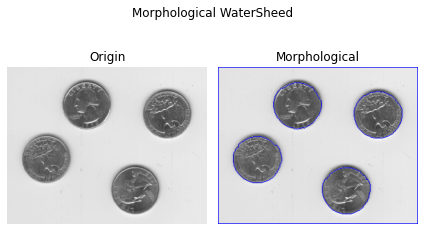

In [31]:
#Morphology Watersheed
coin = cv2.imread("data/10.6/eight.tif")
img = cv2.imread("data/10.6/eight.tif")

mor_war = morphological(img)

result = mor_war.morphol()

multiplot("Morphological WaterSheed", {"Origin":coin, "Morphological":result})